In [2]:
import pandas as pd
import numpy as np
import librosa 

import seaborn as sn
import matplotlib.pyplot as plt
import IPython.display as ipd #palying audio
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import os
import csv
import soundfile
import sklearn
from matplotlib.colors import Normalize
import glob
from scipy.stats import kurtosis, skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_validate
import pickle
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE

In [3]:
path = os.chdir('C:/Users/makye/OneDrive/Documents/Career/BeCode/study/Data_preprocessing/audioProcessing/valve')
print(os.getcwd())

C:\Users\makye\OneDrive\Documents\Career\BeCode\study\Data_preprocessing\audioProcessing\valve


In [4]:
# load dataset

def loadData():
    
    #Pulling the data
    path = 'martin_valve40.csv'
    df = pd.read_csv(path)
    return df

df = loadData()
df


,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,target
0,0.602637,0.071476,1.0,0.227774,0.585758,0.015487,2.874560e-17,2.716805,0.050567,0.002475,...,-0.551907,2.522632,-2.773360,2.369489,-4.333429,4.333409,-2.504099,-0.896134,-2.060452,0
1,0.645485,0.137317,1.0,0.210833,0.636642,0.020151,8.402055e-17,3.466863,0.085929,0.000769,...,-2.018135,2.676596,-2.036510,3.798639,-2.704311,2.842574,-2.270307,0.777605,-0.973281,0
2,0.240859,0.005469,1.0,0.268919,0.146407,0.016171,6.709157e-17,3.377365,0.077094,0.000618,...,-10.786222,-8.318110,-6.055274,7.495485,1.350507,6.750520,-5.181309,-4.851731,-8.183991,0
3,0.614015,0.124540,1.0,0.219609,0.589665,0.021118,9.043221e-17,1.636918,0.072139,0.001278,...,-2.463306,2.576881,-2.280949,3.937058,-4.021860,0.978857,-2.698501,0.857604,-0.175833,0
4,0.338163,0.011525,1.0,0.296418,0.214562,0.016868,7.645408e-17,1.486315,0.062026,0.000514,...,-4.618228,9.431211,4.624210,6.807269,-6.304316,-3.367886,-7.888888,4.424124,1.800391,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12505,0.480917,0.051443,1.0,0.272797,0.427906,0.002343,4.672766e-18,0.783690,0.015455,0.000058,...,-1.618798,3.554687,-1.941166,1.533727,-3.664468,4.655882,-2.008286,0.728686,0.741715,1
12506,0.577043,0.043479,1.0,0.231606,0.548817,0.002291,5.632966e-18,0.777710,0.015521,0.000065,...,-1.913835,1.741258,-2.890882,1.032992,-4.025675,3.648837,-1.286240,1.761818,0.029012,1
12507,0.368881,0.021967,1.0,0.290915,0.257171,0.001931,5.017236e-18,0.741821,0.014641,0.000052,...,5.835861,4.305128,-7.066517,-4.671091,-9.005202,2.159684,1.709826,5.982321,-0.461442,1
12508,0.530236,0.077034,1.0,0.252093,0.479229,0.002478,6.601193e-18,0.873654,0.015781,0.000088,...,-3.307174,0.035680,-4.453303,0.858348,-5.692404,1.253912,-1.912903,0.841498,-0.169960,1


In [5]:
#Creating header for features
header = ''

variables = ['chroma_stft', 'mel_spec',  'rms_f',  'spec_cent', 'spec_bw', 'rolloff', 'zcrf']

for i in variables:
    
    header += f' mean_{i}'
    header += f' min_{i}'
    header += f' max_{i}'
    header += f' std_{i}'
    header += f' median_{i}'
    
for i in range(1, 41):
    header += f' mean_mfcc{i}'
        
for i in range(1, 41):
    header += f' min_mfcc{i}'
        
for i in range(1, 41):
    header += f' max_mfcc{i}'
        
for i in range(1, 41):
    header += f' std_mfcc{i}'
        
for i in range(1, 41):
    header += f' median_mfcc{i}'
    
header = header.split()

In [6]:
# Adding header to features

features = df.iloc[:, :-1] #Selecting features
features.columns = header # Adding header to features
features

,mean_chroma_stft,min_chroma_stft,max_chroma_stft,std_chroma_stft,median_chroma_stft,mean_mel_spec,min_mel_spec,max_mel_spec,std_mel_spec,median_mel_spec,...,median_mfcc31,median_mfcc32,median_mfcc33,median_mfcc34,median_mfcc35,median_mfcc36,median_mfcc37,median_mfcc38,median_mfcc39,median_mfcc40
0,0.602637,0.071476,1.0,0.227774,0.585758,0.015487,2.874560e-17,2.716805,0.050567,0.002475,...,1.301033,-0.551907,2.522632,-2.773360,2.369489,-4.333429,4.333409,-2.504099,-0.896134,-2.060452
1,0.645485,0.137317,1.0,0.210833,0.636642,0.020151,8.402055e-17,3.466863,0.085929,0.000769,...,0.898998,-2.018135,2.676596,-2.036510,3.798639,-2.704311,2.842574,-2.270307,0.777605,-0.973281
2,0.240859,0.005469,1.0,0.268919,0.146407,0.016171,6.709157e-17,3.377365,0.077094,0.000618,...,0.708288,-10.786222,-8.318110,-6.055274,7.495485,1.350507,6.750520,-5.181309,-4.851731,-8.183991
3,0.614015,0.124540,1.0,0.219609,0.589665,0.021118,9.043221e-17,1.636918,0.072139,0.001278,...,-0.721104,-2.463306,2.576881,-2.280949,3.937058,-4.021860,0.978857,-2.698501,0.857604,-0.175833
4,0.338163,0.011525,1.0,0.296418,0.214562,0.016868,7.645408e-17,1.486315,0.062026,0.000514,...,-10.224876,-4.618228,9.431211,4.624210,6.807269,-6.304316,-3.367886,-7.888888,4.424124,1.800391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12505,0.480917,0.051443,1.0,0.272797,0.427906,0.002343,4.672766e-18,0.783690,0.015455,0.000058,...,-0.647994,-1.618798,3.554687,-1.941166,1.533727,-3.664468,4.655882,-2.008286,0.728686,0.741715
12506,0.577043,0.043479,1.0,0.231606,0.548817,0.002291,5.632966e-18,0.777710,0.015521,0.000065,...,2.193210,-1.913835,1.741258,-2.890882,1.032992,-4.025675,3.648837,-1.286240,1.761818,0.029012
12507,0.368881,0.021967,1.0,0.290915,0.257171,0.001931,5.017236e-18,0.741821,0.014641,0.000052,...,1.610114,5.835861,4.305128,-7.066517,-4.671091,-9.005202,2.159684,1.709826,5.982321,-0.461442
12508,0.530236,0.077034,1.0,0.252093,0.479229,0.002478,6.601193e-18,0.873654,0.015781,0.000088,...,-2.330652,-3.307174,0.035680,-4.453303,0.858348,-5.692404,1.253912,-1.912903,0.841498,-0.169960


In [7]:
#defining features and target/scaling

X = features
y = df.iloc[:, -1]

scaler = StandardScaler()
# keep our unscaled features just in case we need to process them alternatively
X_scaled = scaler.fit_transform(X)

scaler = MinMaxScaler()
# keep our unscaled features just in case we need to process them alternatively
X_minmax = scaler.fit_transform(X)


In [8]:
############# Unscaled test/train set #############
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

############ Standard Scaled test/train set ###########
# The labels/classes (y_train, y_test) never change, keep old values 
X_train_scaled, X_test_scaled, _, _ = train_test_split(
    X_scaled, 
    y, 
    test_size=0.2, 
    random_state=42
)

############# MinMax Scaled test/train set ###############
# The labels/classes (y_train, y_test) never change, keep old values 
X_train_minmax, X_test_minmax, _, _ = train_test_split(
    X_scaled, 
    y, 
    test_size=0.2, 
    random_state=42
)

In [9]:
#Unscaled:

classification_models = [
    KNeighborsClassifier(),#(3),
    SVC(kernel='linear'),#, C=0.025),
    SVC(kernel='rbf'),
    DecisionTreeClassifier(),#max_depth=5),
    RandomForestClassifier(),#max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

scores = []
for model in classification_models:
    model.fit(X_train, y_train) #Unscaled train
    score = model.score(X_test, y_test) #unscaled test
    model_name = type(model).__name__
    if model_name=='SVC' and model.kernel=='rbf': model_name+=' RBF kernel'
    scores.append((model_name,(f'{100*score:.2f}%')))
# Make it pretty
scores_df = pd.DataFrame(scores,columns=['Classifier','Accuracy Score'])
scores_df.sort_values(by='Accuracy Score',axis=0,ascending=False)

C:\Users\makye\anaconda3\envs\AudioProcessing\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,Classifier,Accuracy Score
1,SVC,98.36%
7,QuadraticDiscriminantAnalysis,97.16%
5,AdaBoostClassifier,97.08%
4,RandomForestClassifier,96.88%
3,DecisionTreeClassifier,95.08%
0,KNeighborsClassifier,91.09%
6,GaussianNB,88.97%
2,SVC RBF kernel,88.89%


In [10]:
#Scaled
classification_models = [
    KNeighborsClassifier(),#(3),
    SVC(kernel='linear'),#, C=0.025),
    SVC(kernel='rbf'),
    DecisionTreeClassifier(),#max_depth=5),
    RandomForestClassifier(),#max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

scores = []
for model in classification_models:
    model.fit(X_train_scaled, y_train) #scaled train
    score = model.score(X_test_scaled, y_test) #Scaled test
    model_name = type(model).__name__
    if model_name=='SVC' and model.kernel=='rbf': model_name+=' RBF kernel'
    scores.append((model_name,(f'{100*score:.2f}%')))
# Make it pretty
scores_df = pd.DataFrame(scores,columns=['Classifier','Accuracy Score'])
scores_df.sort_values(by='Accuracy Score',axis=0,ascending=False)

C:\Users\makye\anaconda3\envs\AudioProcessing\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,Classifier,Accuracy Score
7,QuadraticDiscriminantAnalysis,99.16%
1,SVC,98.80%
2,SVC RBF kernel,98.68%
5,AdaBoostClassifier,97.08%
4,RandomForestClassifier,96.80%
0,KNeighborsClassifier,95.52%
3,DecisionTreeClassifier,94.96%
6,GaussianNB,88.33%


In [44]:
#RandomForest Classifier (unScaled features)
classifier = RandomForestClassifier(random_state=42, n_estimators=35)
# classifier  = SVC()
classifier.fit(X_train, y_train) #scaled train
# score = model.score(X_test_scaled, y_test)
y_pred = classifier.predict(X_test)

In [45]:
def Metrics(y_test, y_pred):
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print(accuracy_score(y_test, y_pred))
    
Metrics(y_test, y_pred)

[[2224    0]
 [  75  203]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2224
           1       1.00      0.73      0.84       278

    accuracy                           0.97      2502
   macro avg       0.98      0.87      0.91      2502
weighted avg       0.97      0.97      0.97      2502

0.9700239808153477


Text(69.0, 0.5, 'True Values')

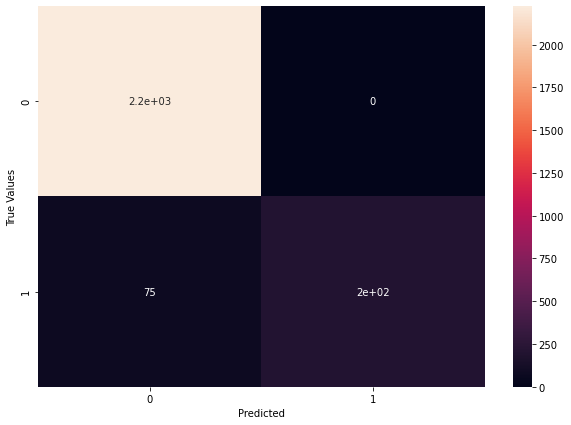

In [46]:
#Plotting confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('True Values')

In [82]:
#Cross Validation????
cv = cross_validate(classifier, X_scaled, y, cv=5)
print(cv['test_score'])
print(cv['test_score'].mean())

[0.47496947 0.86853887 0.96091205 0.9784202  0.95969055]
0.8485062289622551


In [47]:
#Save model
filename = 'finalized_model_valveRF73USc.sav'
pickle.dump(classifier, open(filename, 'wb'))
 

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00063
Feature: 3, Score: 0.00064
Feature: 4, Score: 0.00067
Feature: 5, Score: 0.00070
Feature: 6, Score: 0.00072
Feature: 7, Score: 0.00075
Feature: 8, Score: 0.00086
Feature: 9, Score: 0.00087
Feature: 10, Score: 0.00093
Feature: 11, Score: 0.00094
Feature: 12, Score: 0.00094
Feature: 13, Score: 0.00095
Feature: 14, Score: 0.00095
Feature: 15, Score: 0.00097
Feature: 16, Score: 0.00097
Feature: 17, Score: 0.00098
Feature: 18, Score: 0.00099
Feature: 19, Score: 0.00100
Feature: 20, Score: 0.00102
Feature: 21, Score: 0.00103
Feature: 22, Score: 0.00104
Feature: 23, Score: 0.00105
Feature: 24, Score: 0.00105
Feature: 25, Score: 0.00107
Feature: 26, Score: 0.00107
Feature: 27, Score: 0.00109
Feature: 28, Score: 0.00111
Feature: 29, Score: 0.00112
Feature: 30, Score: 0.00112
Feature: 31, Score: 0.00114
Feature: 32, Score: 0.00115
Feature: 33, Score: 0.00115
Feature: 34, Score: 0.00115
Feature: 35, Score: 0.00117
Fe

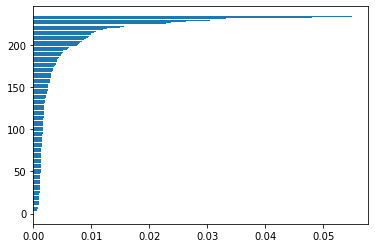

In [52]:
# Calculate & plot Feature importance 
importance = list(classifier.feature_importances_)
importance.sort()

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.barh([x for x in range(len(importance))], importance)
plt.show()

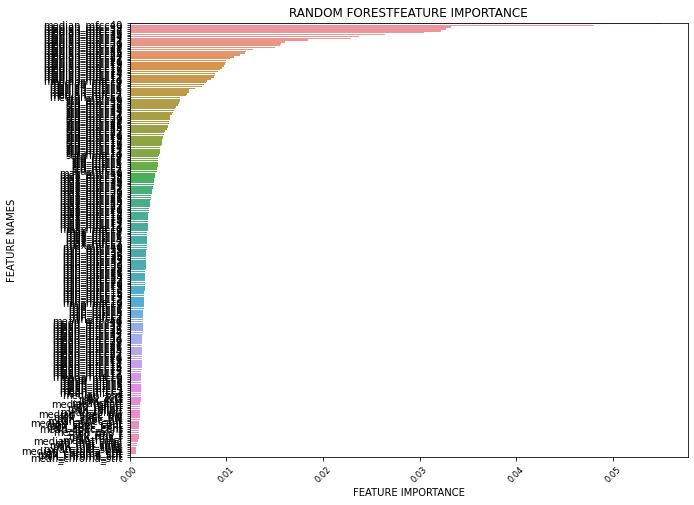

In [53]:
# Calculating and plotting feature importance

def plot_feature_importance(importance,names,model_type):

                #Create arrays from feature importance and feature names
                feature_importance = np.array(importance)
                feature_names = np.array(names)

                #Create a DataFrame using a Dictionary
                data={'feature_names':feature_names,'feature_importance':feature_importance}
                fi_df = pd.DataFrame(data)

                #Sort the DataFrame in order decreasing feature importance
                fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

                #Define size of bar plot
                plt.figure(figsize=(10,8))
                #Plot Searborn bar chart
                sn.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
                #Add chart labels
                plt.tick_params(axis='x', which='major', labelsize= 'small', rotation=45)
                plt.title(model_type + 'FEATURE IMPORTANCE')
                plt.xlabel('FEATURE IMPORTANCE')
                plt.ylabel('FEATURE NAMES')


# calling function
plot_feature_importance(importance, features.columns,'RANDOM FOREST')


In [27]:
# Feature selection by feature importance of random forest classifier

#Selecting important features
sel = SelectFromModel(RandomForestClassifier(n_estimators=35, random_state=42, n_jobs=-1))
sel.fit(X_train, y_train)
sel.get_support()#Returns array of boolean values with importance status

array([False, False, False, False, False,  True, False,  True, False,
       False,  True, False,  True,  True, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False,  True, False,
        True, False,  True, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False,  True, False,  True, False,  True,  True,
       False, False,

In [28]:
#Feature columns
X_train.columns

Index(['mean_chroma_stft', 'min_chroma_stft', 'max_chroma_stft',
       'std_chroma_stft', 'median_chroma_stft', 'mean_mel_spec',
       'min_mel_spec', 'max_mel_spec', 'std_mel_spec', 'median_mel_spec',
       ...
       'median_mfcc31', 'median_mfcc32', 'median_mfcc33', 'median_mfcc34',
       'median_mfcc35', 'median_mfcc36', 'median_mfcc37', 'median_mfcc38',
       'median_mfcc39', 'median_mfcc40'],
      dtype='object', length=235)

In [29]:
#retained features
retained = X_train.columns[sel.get_support()]
retained

Index(['mean_mel_spec', 'max_mel_spec', 'mean_rms_f', 'max_rms_f', 'std_rms_f',
       'max_spec_cent', 'max_spec_bw', 'max_rolloff', 'max_zcrf', 'std_zcrf',
       'min_mfcc2', 'min_mfcc3', 'min_mfcc5', 'min_mfcc7', 'min_mfcc9',
       'min_mfcc16', 'min_mfcc20', 'max_mfcc1', 'max_mfcc4', 'max_mfcc6',
       'max_mfcc8', 'max_mfcc10', 'max_mfcc11', 'max_mfcc15', 'max_mfcc21',
       'max_mfcc26', 'max_mfcc28', 'max_mfcc30', 'max_mfcc39', 'std_mfcc1',
       'std_mfcc3', 'std_mfcc4', 'std_mfcc6', 'std_mfcc8', 'std_mfcc9',
       'std_mfcc10', 'std_mfcc12', 'std_mfcc14', 'std_mfcc15', 'std_mfcc16',
       'std_mfcc17', 'std_mfcc18', 'std_mfcc20', 'std_mfcc21', 'std_mfcc25',
       'std_mfcc26', 'std_mfcc28', 'std_mfcc31', 'std_mfcc37', 'std_mfcc39'],
      dtype='object')

In [30]:
#Number of retained features
len(retained)

50

In [31]:
# overall mean importance of selected features
print(np.mean(sel.estimator_.feature_importances_))

#features above the mean importance carry more weight
sel.estimator_.feature_importances_

0.00425531914893617


array([0.0011826 , 0.00169875, 0.        , 0.00111723, 0.00115222,
       0.00515915, 0.        , 0.00674706, 0.00290928, 0.00416559,
       0.00469236, 0.00420651, 0.02637721, 0.03277192, 0.00231677,
       0.00151112, 0.00124311, 0.01143578, 0.00331828, 0.00095141,
       0.00158365, 0.00255933, 0.00911083, 0.00187657, 0.00127472,
       0.00149204, 0.00177933, 0.00986785, 0.00221297, 0.00095376,
       0.00113859, 0.00123311, 0.01075928, 0.00764921, 0.0017436 ,
       0.00209619, 0.00159776, 0.00250443, 0.00238262, 0.00170696,
       0.00188942, 0.00177781, 0.00178807, 0.00114529, 0.00296968,
       0.00139844, 0.00155197, 0.00187735, 0.0012898 , 0.00136819,
       0.00138452, 0.0026136 , 0.00096642, 0.00190925, 0.00096776,
       0.00101619, 0.00072347, 0.00215978, 0.00177445, 0.00145769,
       0.00187208, 0.00170969, 0.00172572, 0.00105232, 0.00150618,
       0.00124342, 0.00253832, 0.00117548, 0.00159162, 0.00152916,
       0.00069583, 0.00064237, 0.00135347, 0.00149425, 0.00112

In [49]:
#function to call alogarithm for RandomForest
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=35, random_state=42, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('Accuracy:', accuracy_score(y_test, y_pred))

In [50]:
%%time
#Calling function on untrimmed dataset

run_randomForest(X_train, X_test, y_train, y_test)

[[2224    0]
 [  75  203]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2224
           1       1.00      0.73      0.84       278

    accuracy                           0.97      2502
   macro avg       0.98      0.87      0.91      2502
weighted avg       0.97      0.97      0.97      2502

Accuracy: 0.9700239808153477
Wall time: 1.51 s


In [51]:
%%time

X_train_rfc = sel.transform(X_train)
X_test_rfc = sel.transform(X_test)

#Calling function on trimmed dataset (with selected features)
run_randomForest(X_train_rfc, X_test_rfc, y_train, y_test)

[[2217    7]
 [  56  222]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2224
           1       0.97      0.80      0.88       278

    accuracy                           0.97      2502
   macro avg       0.97      0.90      0.93      2502
weighted avg       0.97      0.97      0.97      2502

Accuracy: 0.9748201438848921
Wall time: 1.02 s


In [ ]:
# RF-Unscaled svc

In [55]:
#create overall dataframe 

#Append target to features dataframe
new_df = pd.concat([features, y], axis=1)

#Adding column 'machine ID' (valve = 6)
new_df['Machine_ID'] = 6
new_df


#CSV of dataFrame

def createCsv(df):
    

    df.to_csv('martin_valve40.csv', index=False)
    
createCsv(new_df)

In [ ]:

# some time later...
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded